In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
offer = pd.read_csv('/Users/apple/Desktop/Starbucks/portfolio.csv')
offer.head()

,Unnamed: 0,reward,channels,difficulty,duration,offer_type,id
0,0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [3]:
customer = pd.read_csv('/Users/apple/Desktop/Starbucks/profile.csv')
customer.head()

,Unnamed: 0,gender,age,id,became_member_on,income
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [4]:
transcript = pd.read_csv('/Users/apple/Desktop/Starbucks/transcript.csv')
transcript.head()

,Unnamed: 0,person,event,value,time
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [5]:
offer = offer.drop('Unnamed: 0', axis = 1)
customer = customer.drop('Unnamed: 0', axis = 1)
transcript = transcript.drop('Unnamed: 0', axis = 1)

In [6]:
customer.head()

,gender,age,id,became_member_on,income
0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [7]:
customer.shape

(17000, 5)

In [8]:
transcript.shape

(306534, 4)

In [9]:
customer.isna().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [10]:
customer=customer.dropna()

In [11]:
customer

,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


In [12]:
#Transform df-transcript
# Elements in value_columns are strings. Convert them to dictionaries
value_column = transcript['value']
value_column = value_column.apply(eval)
value_column[:3]

0    {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1    {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2    {'offer id': '2906b810c7d4411798c6938adc9daaa5'}
Name: value, dtype: object

In [13]:
# Extract the keys
dictionary_key_column = [list(d.keys())[0] for d in value_column]
# Extract the values
dictionary_value_column = [list(d.values())[0] for d in value_column]
# Create a df containing the keys and values of the dictionary elements of `value_column`
value_column_split = pd.DataFrame(columns = ['dict_key', 'dict_value'])
value_column_split['dict_key'] = dictionary_key_column
value_column_split['dict_value'] = dictionary_value_column
value_column_split.head(3)

,dict_key,dict_value
0,offer id,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,offer id,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,offer id,2906b810c7d4411798c6938adc9daaa5


In [14]:
# Replace `value` column with df `value_column_split`
transcript = transcript.drop('value', axis = 1)

In [15]:
transcript = pd.concat([transcript, value_column_split], axis = 1)

In [16]:
transcript

,person,event,time,dict_key,dict_value
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,offer id,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,offer id,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,e2127556f4f64592b11af22de27a7932,offer received,0,offer id,2906b810c7d4411798c6938adc9daaa5
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,offer id,fafdcd668e3743c1bb461111dcafc2a4
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,offer id,4d5c57ea9a6940dd891ad53e9dbe8da0
...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714,amount,1.59
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,amount,9.53
306531,a00058cf10334a308c68e7631c529907,transaction,714,amount,3.61
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714,amount,3.53


## Customer Segmentation
Customers will be assigned to segments based on their transactional records during the month of campiagn. Features extracted include (or each customer) number of offers received, number of offers viewed, number of offers completed, number of transactions made (during the month of campiagn) and total amount of money spent.

In [17]:
# Create an empty df with columns needed
customer_behavior = pd.DataFrame(columns = ['person', 'num_received', 'num_viewed', 'num_completed', 'num_transactions', 'money_spent'])

In [18]:
# Add data to `person`, ordered in ascending order
customer_behavior['person'] = transcript.value_counts('person').sort_index().index.values

In [19]:
# Aggregate df transcripts
transcript = transcript.sort_values('person')
transcripts_grouped = transcript.groupby(['person', 'event']).count()
transcripts_grouped.head()

time  dict_key  dict_value
person                           event                                      
0009655768c64bdeb2e877511632db8f offer completed     3         3           3
                                 offer received      5         5           5
                                 offer viewed        4         4           4
                                 transaction         8         8           8
00116118485d4dfda04fdbaba9a87b5c offer received      2         2           2

In [20]:
# Set `person` as index for easy slicing
customer_behavior.set_index('person', inplace = True)

In [21]:
# Add data to `num_received`, `num_viewed`, `num_completed` and `num_transactions`
for person_id in customer_behavior.index.values:
    if (person_id, 'offer received') in list(transcripts_grouped.index.values):
        customer_behavior.loc[person_id, 'num_received'] = transcripts_grouped.loc[(person_id, 'offer received'), 'dict_key']
    if (person_id, 'offer viewed') in list(transcripts_grouped.index.values):
        customer_behavior.loc[person_id, 'num_viewed'] = transcripts_grouped.loc[(person_id, 'offer viewed'), 'dict_key']
    if (person_id, 'offer completed') in list(transcripts_grouped.index.values):
        customer_behavior.loc[person_id, 'num_completed'] = transcripts_grouped.loc[(person_id, 'offer completed'), 'dict_key']
    if (person_id, 'transaction') in list(transcripts_grouped.index.values):
        customer_behavior.loc[person_id, 'num_transactions'] = transcripts_grouped.loc[(person_id, 'transaction'), 'dict_key']

In [22]:
# Calculate how much money each customer spent during the month of the campaign
money_spent = transcript[transcript['event'] == 'transaction'].groupby('person').agg({'dict_value': 'sum'})

# Add to `money_spent`
customer_behavior['money_spent'] = money_spent


In [23]:
customer_behavior.head(10)

,num_received,num_viewed,num_completed,num_transactions,money_spent
person,,,,,
0009655768c64bdeb2e877511632db8f,5,4,3,8,127.6
00116118485d4dfda04fdbaba9a87b5c,2,2,NaN,3,4.09
0011e0d4e6b944f998e987f904e8c1e5,5,5,3,5,79.46
0020c2b971eb4e9188eac86d93036a77,5,3,3,8,196.86
0020ccbbb6d84e358d3414a3ff76cffd,4,4,3,12,154.05
003d66b6608740288d6cc97a6903f4f0,5,4,3,18,48.34
00426fe3ffde4c6b9cb9ad6d077a13ea,5,2,1,17,68.51
004b041fbfe44859945daa2c7f79ee64,3,2,2,6,138.36
004c5799adbf42868b9cff0396190900,5,4,5,12,347.38


In [24]:
customer_behavior.isna().sum()

num_received           6
num_viewed           166
num_completed       4226
num_transactions     422
money_spent          422
dtype: int64

Note: There are 6 customers that did not receive any offer during the campaign (but they have made purchases to appear in our data). \
This results in NAs in the aggregated df and will be replaced with 0s, as these customers received, viewed, completed 0 offers or made 0 transactions.

In [25]:
# Replace NA with 0
customer_behavior.fillna(0, inplace = True)
customer_behavior.isna().sum()


num_received        0
num_viewed          0
num_completed       0
num_transactions    0
money_spent         0
dtype: int64

Drop column num_received
I am going to be using features about customer behavior for clustering analysis. However, number of offers received was not actively decided by customers, therfore I will drop it when running clustering.



In [26]:
# Keep a copy of the df with `num_received`
customer_behavior_with_num_received = customer_behavior.copy()

# Drop `num_received`
customer_behavior.drop('num_received', axis = 1, inplace = True)
customer_behavior.head(3)


,num_viewed,num_completed,num_transactions,money_spent
person,,,,
0009655768c64bdeb2e877511632db8f,4,3,8,127.60
00116118485d4dfda04fdbaba9a87b5c,2,0,3,4.09
0011e0d4e6b944f998e987f904e8c1e5,5,3,5,79.46


In [27]:
scaler = StandardScaler()
customer_behavior_scaled = scaler.fit_transform(customer_behavior)

In [28]:
pd.DataFrame(data = customer_behavior_scaled, columns = customer_behavior.columns.values).head(3)

,num_viewed,num_completed,num_transactions,money_spent
0,0.465787,0.638278,-0.033953,0.183941
1,-1.075503,-1.230281,-1.011260,-0.796928
2,1.236432,0.638278,-0.620337,-0.198369


/Users/apple/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/apple/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/apple/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/apple/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 1

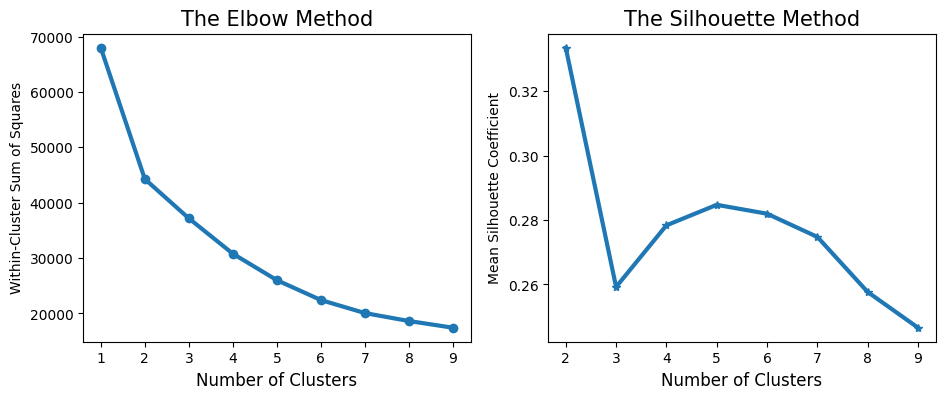

In [29]:
#OPtimal cluster of K
df_feature = customer_behavior_scaled
wcss = []
sil_score = []
max_clusters = 10

for k in range(1, max_clusters):
    kmeans = KMeans(n_clusters = k, random_state = 10)
    kmeans.fit(df_feature)
    # calculate wcss for the Elbow Method
    wcss.append(kmeans.inertia_)
    
    # calculate the mean Silhouette coefficient
    if k >= 2:
        labels = kmeans.labels_
        sil_score.append(metrics.silhouette_score(df_feature, labels))

        # Plot
fig, axs = plt.subplots(1,2, figsize = (11,4))
axs[0].plot(np.arange(1, max_clusters), wcss, marker = 'o', lw = 3)
axs[0].set_xlabel('Number of Clusters', fontsize = 12)
axs[0].set_ylabel('Within-Cluster Sum of Squares')
axs[0].set_title('The Elbow Method', fontsize = 15)

axs[1].plot(np.arange(2, max_clusters), sil_score, marker = '*' , lw = 3)
axs[1].set_xlabel('Number of Clusters', fontsize = 12)
axs[1].set_ylabel('Mean Silhouette Coefficient')
axs[1].set_title('The Silhouette Method', fontsize = 15)
plt.show()


From the Elbow graph, it can be observed (not easily) that from k = 5, the within cluster sum of squares (WCSS) stops decreasing at an increasing rate. \
From the Silhouette graph, the maximum is found at k = 5 (k = 2 excluded). \
5 segments may seem quiet a lot, but if the clusters show clear difference in features, the result should still be intepretable.


/Users/apple/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster
0    4745
1    6259
2     291
3    3437
4    2268
Name: count, dtype: int64

 ************************************************************
Silhouette Score: 0.28471931608328854

 ************************************************************
        num_viewed num_completed num_transactions money_spent
              mean          mean             mean        mean
cluster                                                      
0              4.1           3.8             10.0       186.6
1              2.2           1.0              5.4        50.6
2              3.8           3.5             10.8       774.4
3              4.5           1.0              4.9        38.4
4              3.5           2.1             16.6        95.2


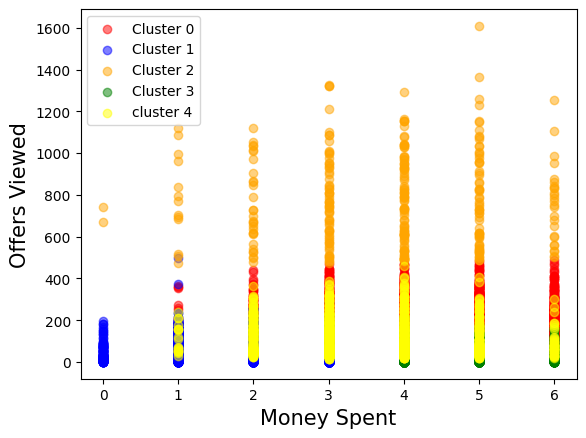

In [30]:
k = 5
df_feature = customer_behavior_scaled
kmeans = KMeans(n_clusters = k, random_state = 10)
kmeans.fit_transform(df_feature)
customer_with_cluster = customer_behavior.assign(cluster = kmeans.labels_)
print(customer_with_cluster.value_counts('cluster').sort_index())

line_sep = '*' * 60
print('\n', line_sep)
print('Silhouette Score:', metrics.silhouette_score(df_feature, labels = kmeans.labels_))

#
cluster_info = customer_with_cluster.groupby('cluster').agg([np.mean])
print('\n', line_sep)
print(cluster_info.round(1))

# Plot
color_list = ['red', 'blue', 'orange', 'green', 'yellow']
legend_list = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'cluster 4']
for i in range(k):
    plt.scatter(customer_with_cluster.loc[customer_with_cluster['cluster'] == i , 'num_viewed'],
               customer_with_cluster.loc[customer_with_cluster['cluster'] == i , 'money_spent'],
               c = color_list[i], label = legend_list[i], alpha = 0.5)
plt.ylabel('Offers Viewed', fontsize = 15)
plt.xlabel('Money Spent', fontsize = 15)
plt.legend(legend_list)
plt.show()


Assessing the clustering results
Here I will use two classification methods to conduct an (indirect) assessment of the clustering results. The labelled cluster (0, 1, 2, 3, 4) will be used as target and customer behavior features used in clustering analysis will be used as inputs.

In [31]:
# Split data for train and test
X = customer_behavior_scaled
Y = customer_with_cluster['cluster']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

In [32]:
# Multiclass logistic regression
clf = LogisticRegression()
clf.fit(x_train, y_train)

# Check test accurracy
y_predict = clf.predict(x_test)
print("Test accuracy:", metrics.accuracy_score(y_test, y_predict))


Test accuracy: 0.9970588235294118


This indicates that the patterns identified by K-Means Clustering for each cluster do exist and are sufficiently clear to be captured by both classification algorithms for over 98% of the samples.



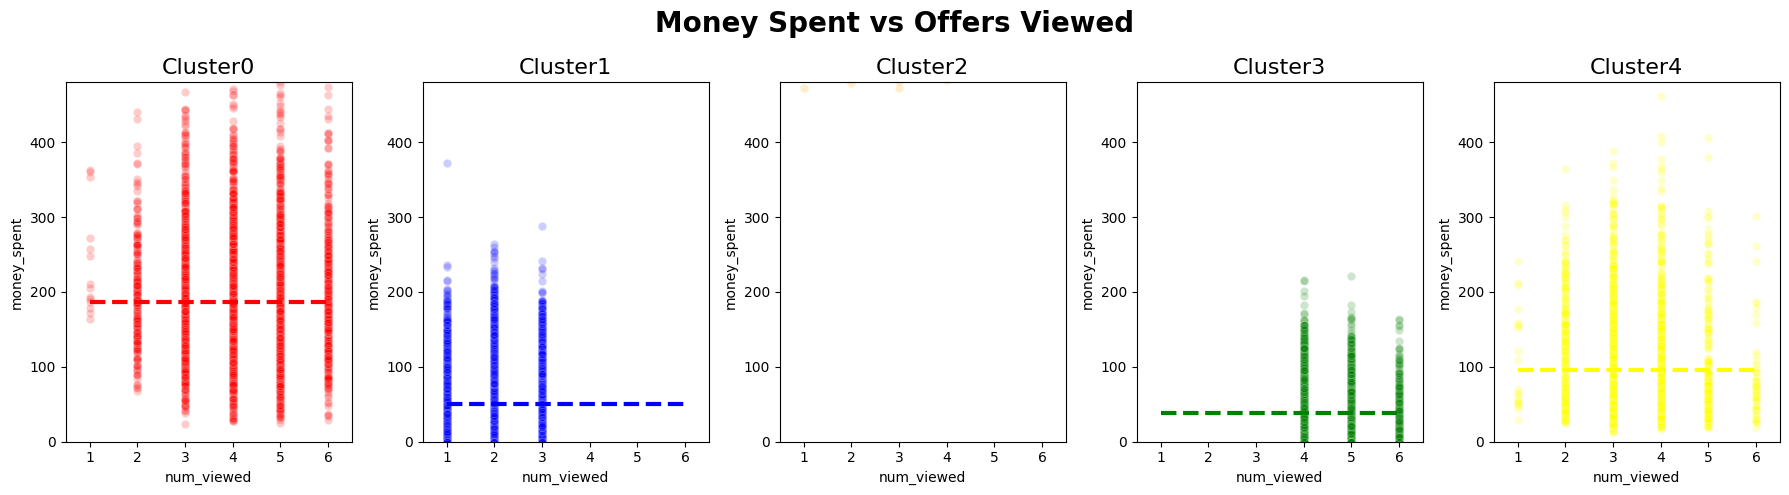

In [33]:
fig, axs = plt.subplots(1, k, figsize = (18,5))
for i in range(k):
    sns.scatterplot(data = customer_with_cluster[customer_with_cluster['cluster'] == i],
                   x = 'num_viewed', y = 'money_spent', alpha = 0.2, color = color_list[i], ax = axs[i])
    
    mean_value = customer_with_cluster[customer_with_cluster['cluster'] == i].agg({'money_spent': 'mean'})
    axs[i].plot(np.arange(1, 7), (np.ones((1, 6))*mean_value.values).reshape((6,-1)), 
                color = color_list[i], lw =3, linestyle = 'dashed')
    axs[i].set_title('Cluster' + str(i), fontsize = 16)
    axs[i].set_xlim((0.5,6.5))
    axs[i].set_ylim((0,480))
fig.suptitle('Money Spent vs Offers Viewed', fontsize = 20, fontweight = 'bold')
plt.tight_layout()
plt.show()


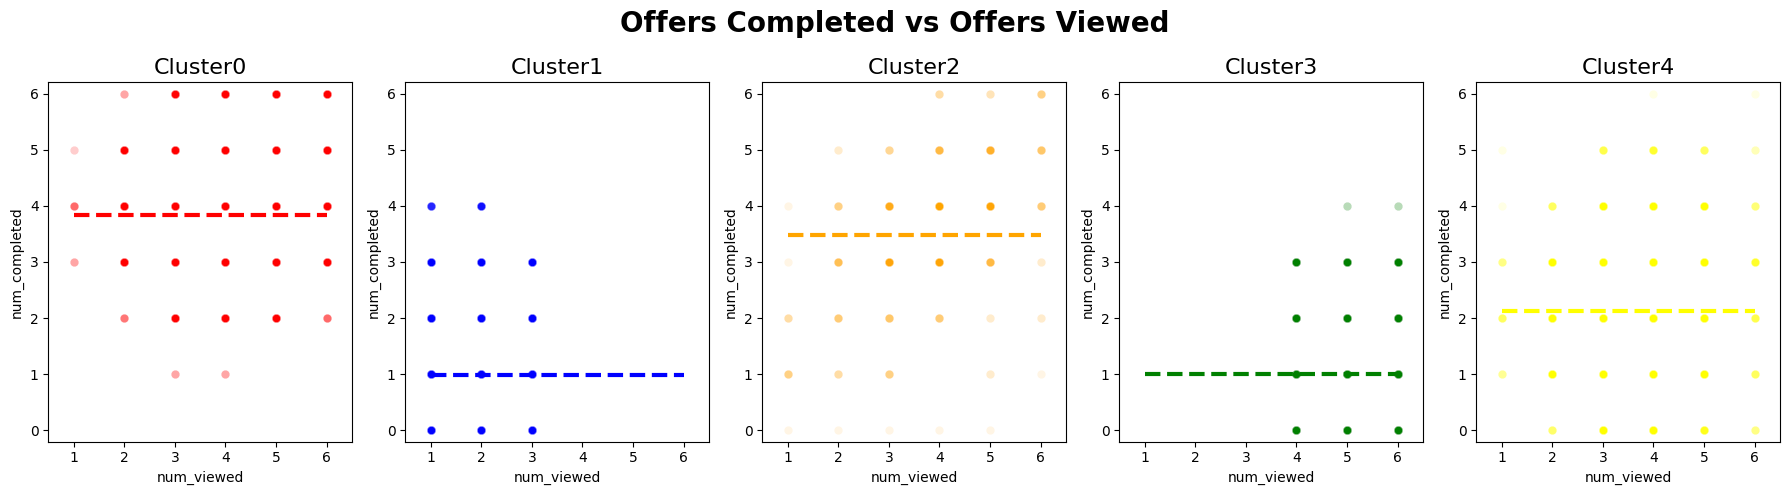

In [34]:
fig, axs = plt.subplots(1, k, figsize = (18,5))
for i in range(k):
    sns.scatterplot(data = customer_with_cluster[customer_with_cluster['cluster'] == i],
                   x = 'num_viewed', y = 'num_completed', alpha = 0.1, color = color_list[i], ax = axs[i])
    
    mean_value = customer_with_cluster[customer_with_cluster['cluster'] == i].agg({'num_completed': 'mean'})
    axs[i].plot(np.arange(1, 7), (np.ones((1, 6))*mean_value.values).reshape((6,-1)), 
                color = color_list[i], lw =3, linestyle = 'dashed')
    axs[i].set_title('Cluster' + str(i), fontsize = 16)
    axs[i].set_xlim((0.5,6.5))
    axs[i].set_ylim((-0.2,6.2))
fig.suptitle('Offers Completed vs Offers Viewed', fontsize = 20, fontweight = 'bold')
plt.tight_layout()
plt.show()


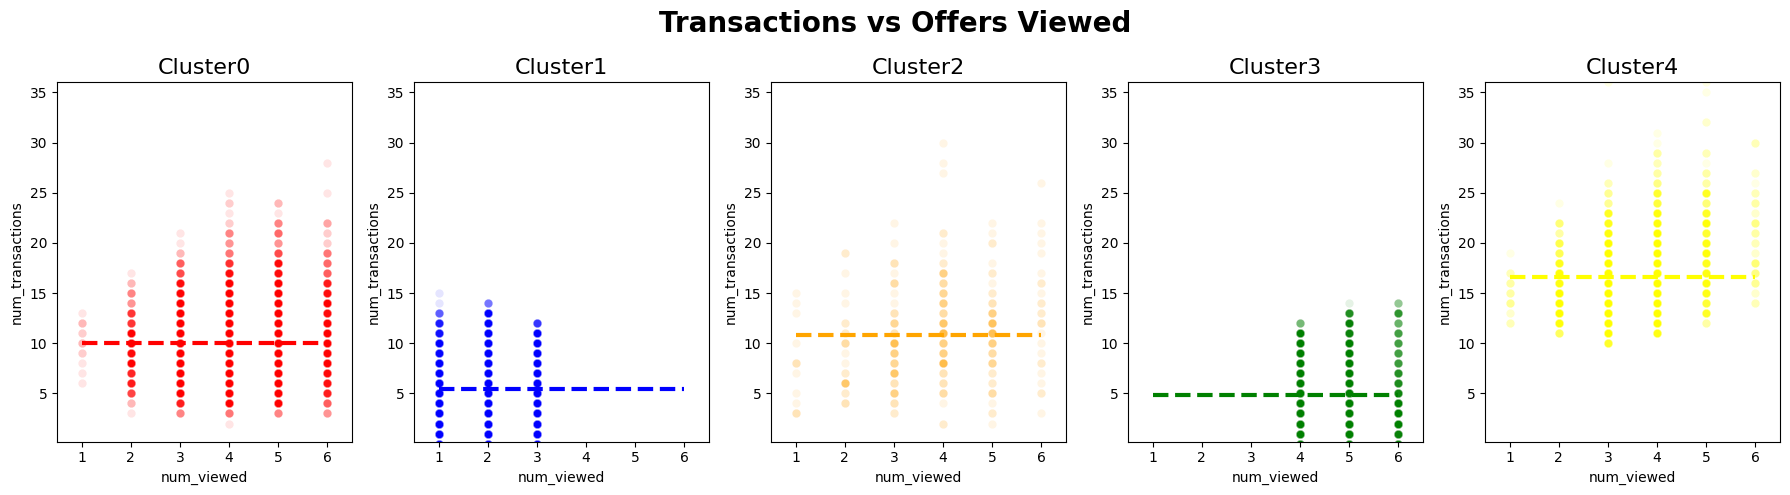

In [35]:
fig, axs = plt.subplots(1, k, figsize = (18,5))
for i in range(k):
    sns.scatterplot(data = customer_with_cluster[customer_with_cluster['cluster'] == i],
                   x = 'num_viewed', y = 'num_transactions', alpha = 0.1, color = color_list[i], ax = axs[i])
    
    mean_value = customer_with_cluster[customer_with_cluster['cluster'] == i].agg({'num_transactions': 'mean'})
    axs[i].plot(np.arange(1, 7), (np.ones((1, 6))*mean_value.values).reshape((6,-1)), 
                color = color_list[i], lw =3, linestyle = 'dashed')
    axs[i].set_title('Cluster' + str(i), fontsize = 16)
    axs[i].set_xlim((0.5,6.5))
    axs[i].set_ylim((0.2,36))
fig.suptitle('Transactions vs Offers Viewed', fontsize = 20, fontweight = 'bold')
plt.tight_layout()
plt.show()

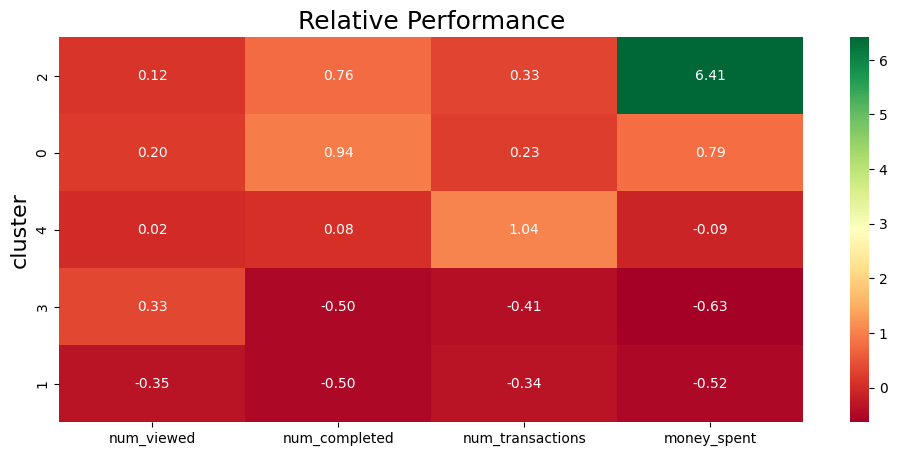

In [36]:
# Calculate the relative performace of cluster's attribute values compared to all customers as a population
cluster_mean = customer_with_cluster.groupby('cluster').mean()
population_mean = customer_with_cluster.mean()
relative_importance = (cluster_mean / population_mean[0 :-1]) - 1

# Sort clusters by overall (summation) performance
importance_ranking = relative_importance.sum(axis = 1).sort_values(ascending = False).index.values
relative_importance = relative_importance.reindex(importance_ranking)

# Plot the heatmap
plt.figure(figsize = (12, k))
plt.title('Relative Performance', fontsize = 18)
plt.xlabel('Feature', fontsize = 16)
plt.ylabel('Cluster', fontsize = 16)
sns.heatmap(data = relative_importance, annot = True, fmt = '.2f', cmap = 'RdYlGn')
plt.show()


Key Metrics of each cluster
To better understand customer behavior of each segment and to guide segment-specific strategies, key metrics interested are: \

Frequency - Number of transactions made during the month of campaign \
Average Purchase Value - Average number of dollars spent on each transaction \
Offer Complete Rate - Offer overall completion rate \
Sensitivity to Offer - Proportion of transactions made with offers (calculated as num_completed divided by num_transactions)

In [37]:
# Calculated the mean of all features for each cluster
temp = pd.merge(customer_with_cluster, customer_behavior_with_num_received['num_received'], left_index = True, right_index = True)
cluster_means = temp.groupby('cluster').mean().round(3)
cluster_means = cluster_means.reindex(importance_ranking)
cluster_means.loc['average'] = cluster_means.mean()

cluster_means

,num_viewed,num_completed,num_transactions,money_spent,num_received
cluster,,,,,
2,3.8080,3.474,10.8350,774.4100,4.6870
0,4.0770,3.831,10.0190,186.5620,4.8960
4,3.4800,2.128,16.6350,95.2290,4.5960
3,4.5230,0.996,4.8600,38.4460,4.9870
1,2.2100,0.981,5.4050,50.6060,3.8530
average,3.6196,2.282,9.5508,229.0506,4.6038


In [38]:
# Create the df for summarizing by clusters
cluster_summary = pd.DataFrame(columns = ['cluster', 'frequency', 'avg_purchase_value', 'offer_complete_rate', 'offer_sensitivity'])
cluster_summary['cluster'] = index = np.arange(k)
cluster_summary.set_index('cluster', drop = True, inplace = True)

In [39]:
# Add values to df `cluster_summary`
cluster_summary['frequency'] = cluster_means['num_transactions'].round(1)
cluster_summary['avg_purchase_value'] = (cluster_means['money_spent'] / cluster_means['num_transactions']).round(1)
cluster_summary['offer_complete_rate'] = (cluster_means['num_completed'] / cluster_means['num_received']).round(2)
cluster_summary['offer_sensitivity'] = (cluster_means['num_completed'] / cluster_means['num_transactions']).round(2)

In [40]:
# Redorder index
cluster_summary = cluster_summary.reindex(importance_ranking)
cluster_summary.loc['average'] = cluster_summary.mean()
cluster_summary

,frequency,avg_purchase_value,offer_complete_rate,offer_sensitivity
cluster,,,,
2,10.80,71.50,0.740,0.320
0,10.00,18.60,0.780,0.380
4,16.60,5.70,0.460,0.130
3,4.90,7.90,0.200,0.200
1,5.40,9.40,0.250,0.180
average,9.54,22.62,0.486,0.242


## Most Valuebale Customers (MVC) - Cluster 2 

These customers viewed and completed a high number of offers. This means they are highly responsive to offers.
They did not make the most purchases (~11, about one purchase every 3 days) but spent the most money among all clusters, more than third times of the overall average during the month of campaign. \
They have the highest Average Purchase Value of 71.5 USD. 

### Recommendations:

Personalized High-Value Offers: Target them with premium offers that encourage bulk purchases or higher-value transactions. \
Loyalty Programs: Enroll them in a loyalty program that rewards spending thresholds to maintain their high spending habits. \
Exclusive Access: Provide them with early access to new products or exclusive events to enhance their brand loyalty.


## High-Potentials - Cluster 0

These customers had the second highest Average Purchase Value of 18.6 USD. \
They have the highest offer complete rate. \
They are most sentitive to offers. 

### Recommendations:

Frequent and Varied Offers: Since they are highly responsive, a variety of offers should be sent their way to encourage exploration of different products. \
Engagement Programs: Create engagement programs that reward them for frequent interactions with offers, incentivizing an even higher completion rate.

## Regulars - Cluster 4

These customers made the most number of purchases during the month of campaign, they are the company's regular customers. \
The number of offers they viewed and completed are around overall average. They are not very sensitive to offers. They are willing to buy with or without offers. \
Suprisingly, their average purchase value over the month of campaign is the lowest,which is only 5.7 USD. \

### Recommendations:

Bundle Offers: Encourage higher spending by offering bundle deals that provide value for a slightly higher price point. \
Cross-Sell Strategies: Implement strategies to cross-sell and up-sell, increasing the transaction size. \
Reward Frequency: Provide incentives for frequent visits, such as a punch card that offers a free item after a certain number of purchases.

## Offer-Viewers - Cluster 3

These customers viewed the most offers (4.5). \
However, they comepleted very few of them (0.996). 

### Recommendations:

Engaging Content: Use more engaging content or storytelling in offers to convert views into completions. \
Feedback Inquiries: Reach out for feedback to understand why they view but don't redeem offers, and adjust the strategy accordingly. \
Limited-Time Offers: Create urgency with time-bound offers that compel immediate action.


## Low-Engagers - Cluster 1

These customers showed low engagement through all features, they also received a lower number of offers. \
They are more like casual customers who just walk in for coffee but not for Starbuscks.

### Recommendations:

Discovery Encouragement: Offer introductory discounts or samples to encourage product exploration and increase engagement. \
Awareness Campaigns: Utilize awareness campaigns to highlight the benefits of engaging with offers and participating in the brand's ecosystem. \
Convenience Offers: Since they may be casual customers, offer convenience-based incentives, such as mobile order-ahead discounts or express line access for app orders.


In [41]:
customer_with_cluster

,num_viewed,num_completed,num_transactions,money_spent,cluster
person,,,,,
0009655768c64bdeb2e877511632db8f,4,3,8,127.60,0
00116118485d4dfda04fdbaba9a87b5c,2,0,3,4.09,1
0011e0d4e6b944f998e987f904e8c1e5,5,3,5,79.46,3
0020c2b971eb4e9188eac86d93036a77,3,3,8,196.86,0
0020ccbbb6d84e358d3414a3ff76cffd,4,3,12,154.05,0
...,...,...,...,...,...
fff3ba4757bd42088c044ca26d73817a,3,3,11,580.98,2
fff7576017104bcc8677a8d63322b5e1,4,3,6,29.94,3
fff8957ea8b240a6b5e634b6ee8eafcf,2,0,5,12.15,1


### Merge customer_behavior with customer¶

In [42]:
# Reset index for `customer_with_cluster`

customer_with_cluster.reset_index(inplace = True)
customer_with_cluster

,person,num_viewed,num_completed,num_transactions,money_spent,cluster
0,0009655768c64bdeb2e877511632db8f,4,3,8,127.60,0
1,00116118485d4dfda04fdbaba9a87b5c,2,0,3,4.09,1
2,0011e0d4e6b944f998e987f904e8c1e5,5,3,5,79.46,3
3,0020c2b971eb4e9188eac86d93036a77,3,3,8,196.86,0
4,0020ccbbb6d84e358d3414a3ff76cffd,4,3,12,154.05,0
...,...,...,...,...,...,...
16995,fff3ba4757bd42088c044ca26d73817a,3,3,11,580.98,2
16996,fff7576017104bcc8677a8d63322b5e1,4,3,6,29.94,3
16997,fff8957ea8b240a6b5e634b6ee8eafcf,2,0,5,12.15,1
16998,fffad4f4828548d1b5583907f2e9906b,4,3,12,88.83,0


In [43]:
# Merge
customer_behavior_profile = pd.merge(customer_with_cluster, customer,
                                    left_on = 'person', right_on = 'id').drop(['id'], axis = 1)

In [44]:
customer_behavior_profile

,person,num_viewed,num_completed,num_transactions,money_spent,cluster,gender,age,became_member_on,income
0,0009655768c64bdeb2e877511632db8f,4,3,8,127.60,0,M,33,20170421,72000.0
1,0011e0d4e6b944f998e987f904e8c1e5,5,3,5,79.46,3,O,40,20180109,57000.0
2,0020c2b971eb4e9188eac86d93036a77,3,3,8,196.86,0,F,59,20160304,90000.0
3,0020ccbbb6d84e358d3414a3ff76cffd,4,3,12,154.05,0,F,24,20161111,60000.0
4,003d66b6608740288d6cc97a6903f4f0,4,3,18,48.34,4,F,26,20170621,73000.0
...,...,...,...,...,...,...,...,...,...,...
14819,fff3ba4757bd42088c044ca26d73817a,3,3,11,580.98,2,F,69,20150920,83000.0
14820,fff7576017104bcc8677a8d63322b5e1,4,3,6,29.94,3,M,71,20171031,73000.0
14821,fff8957ea8b240a6b5e634b6ee8eafcf,2,0,5,12.15,1,M,71,20180218,56000.0
14822,fffad4f4828548d1b5583907f2e9906b,4,3,12,88.83,0,M,34,20170123,34000.0


In [45]:
# Add column `cluster_alias`
customer_behavior_profile['cluster_alias'] = customer_behavior_profile['cluster'].map({2: 'Most-Valables',
                                                                                       4: 'Regulars',
                                                                                       0: 'High-Potentials',
                                                                                       3: 'Offer-Viewers',
                                                                                       1: 'Low-Engagers'})
customer_behavior_profile

,person,num_viewed,num_completed,num_transactions,money_spent,cluster,gender,age,became_member_on,income,cluster_alias
0,0009655768c64bdeb2e877511632db8f,4,3,8,127.60,0,M,33,20170421,72000.0,High-Potentials
1,0011e0d4e6b944f998e987f904e8c1e5,5,3,5,79.46,3,O,40,20180109,57000.0,Offer-Viewers
2,0020c2b971eb4e9188eac86d93036a77,3,3,8,196.86,0,F,59,20160304,90000.0,High-Potentials
3,0020ccbbb6d84e358d3414a3ff76cffd,4,3,12,154.05,0,F,24,20161111,60000.0,High-Potentials
4,003d66b6608740288d6cc97a6903f4f0,4,3,18,48.34,4,F,26,20170621,73000.0,Regulars
...,...,...,...,...,...,...,...,...,...,...,...
14819,fff3ba4757bd42088c044ca26d73817a,3,3,11,580.98,2,F,69,20150920,83000.0,Most-Valables
14820,fff7576017104bcc8677a8d63322b5e1,4,3,6,29.94,3,M,71,20171031,73000.0,Offer-Viewers
14821,fff8957ea8b240a6b5e634b6ee8eafcf,2,0,5,12.15,1,M,71,20180218,56000.0,Low-Engagers
14822,fffad4f4828548d1b5583907f2e9906b,4,3,12,88.83,0,M,34,20170123,34000.0,High-Potentials


In [46]:
importance_ranking

array([2, 0, 4, 3, 1], dtype=int32)

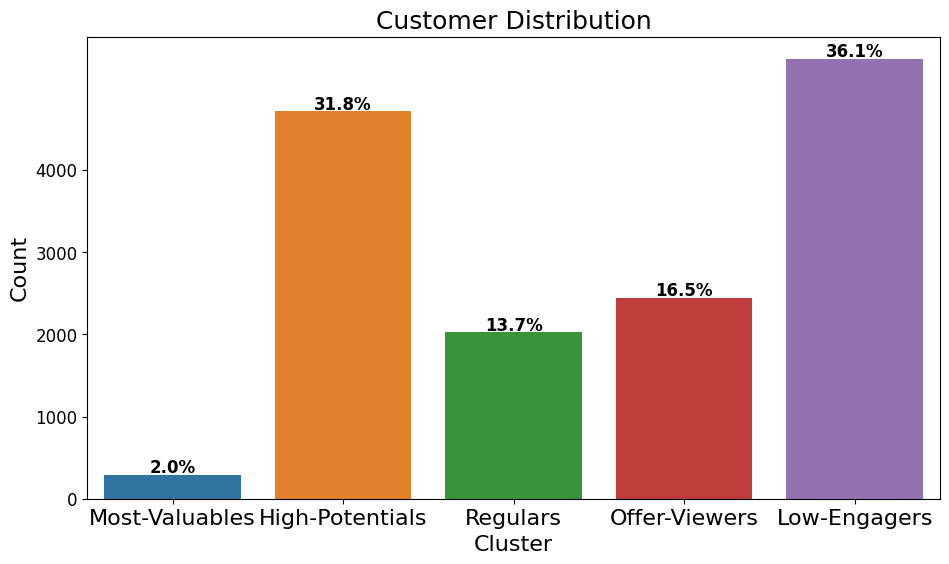

In [47]:
p = customer_behavior_profile.value_counts('cluster').reindex(importance_ranking)
cluster_pct = list((p/p.sum() * 100).round(2))
cluster_names = ['Most-Valuables',  'High-Potentials', 'Regulars','Offer-Viewers', 'Low-Engagers']
fig = plt.figure(figsize = (11,6))
ax = sns.barplot(x = p.index.values, y = p.values, order = importance_ranking)
patches = ax.patches
for i in range(len(p)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height() + 25
    ax.annotate(text = '{:.1f}%'.format(cluster_pct[i]), xy = (x, y), ha = 'center',
               fontsize = 12, weight = 'bold')
    
plt.title('Customer Distribution', fontsize = 18)
plt.xticks(ticks = np.arange(len(p)), labels = cluster_names, fontsize = 16)
plt.yticks(ticks = np.arange(0, 5000, 1000), fontsize = 12)
plt.xlabel('Cluster', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.show()

In [48]:
segment_means = customer_behavior_profile.groupby('cluster').agg({'age': 'mean', 'income': 'mean'}).reindex(importance_ranking)
segment_means.index = ['Most-Valuables', 'High-Potentials', 'Regulars', 'Offer-Viewers', 'Low-Engagers']
segment_means.round(2).head()

,age,income
Most-Valuables,56.52,75168.38
High-Potentials,57.22,73244.17
Regulars,47.94,49609.19
Offer-Viewers,55.43,65406.47
Low-Engagers,53.75,63942.83


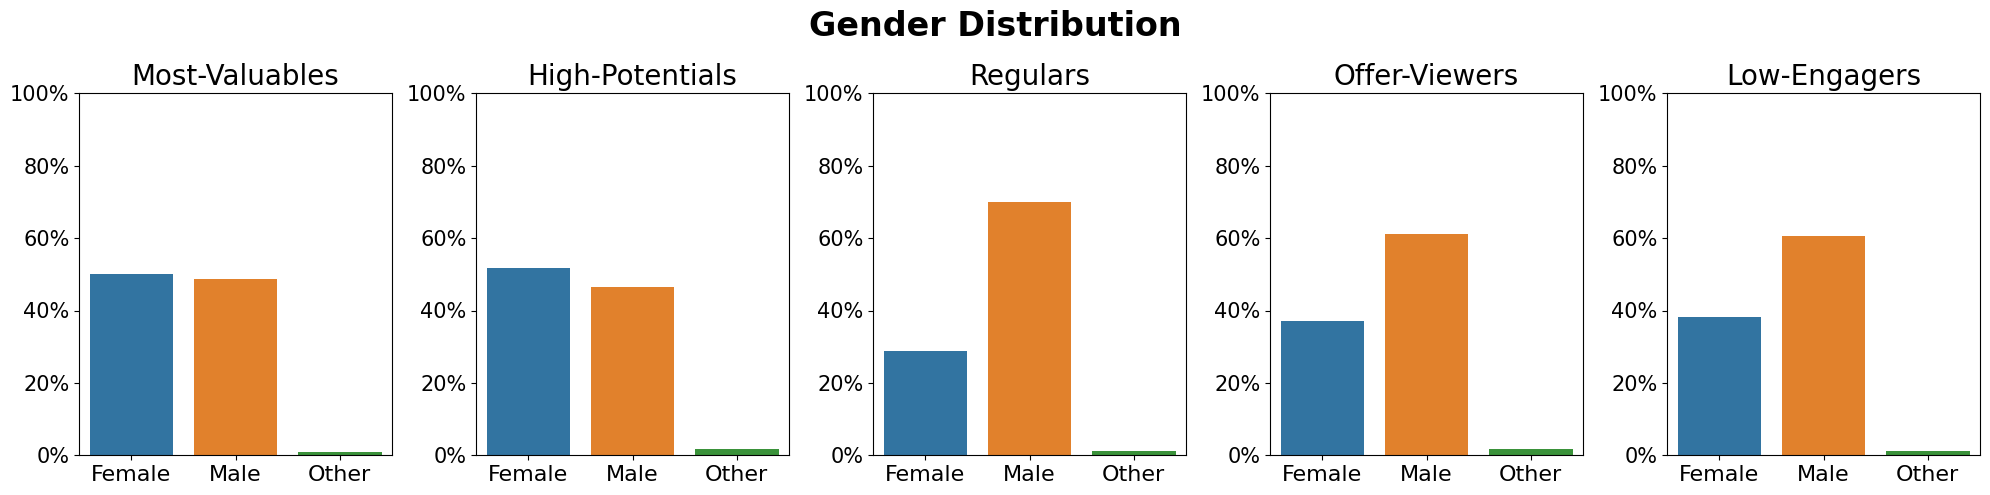

In [49]:
num_clusters = customer_behavior_profile['cluster'].nunique()
fig, axs = plt.subplots(1, num_clusters, figsize = (20,5))
cluster_names = ['Most-Valuables', 'High-Potentials', 'Regulars', 'Offer-Viewers', 'Low-Engagers']
xticklabels = ['Female', 'Male', 'Other']
yticks = np.arange(0,1.2, 0.2)
yticklabels = [str(n) + '%' for n in (yticks * 100).astype(int)]
for i in np.arange(num_clusters):
    p = customer_behavior_profile[customer_behavior_profile['cluster'] == importance_ranking[i]].value_counts('gender').sort_index()
    sns.barplot(x = p.index.values, y = p.values / p.sum(), ax = axs[i])
    axs[i].set_title(cluster_names[i], fontsize = 20)
    axs[i].set_xticklabels(xticklabels, fontsize = 16)
    axs[i].set_yticks(yticks); axs[i].set_yticklabels(yticklabels, fontsize = 15)

plt.suptitle('Gender Distribution', fontsize = 24, fontweight = 'bold')
plt.tight_layout()
plt.show()

In [50]:
customer_behavior_profile_2 = pd.get_dummies(customer_behavior_profile, columns=['gender'], drop_first=True)
customer_behavior_profile_2

,person,num_viewed,num_completed,num_transactions,money_spent,cluster,age,became_member_on,income,cluster_alias,gender_M,gender_O
0,0009655768c64bdeb2e877511632db8f,4,3,8,127.60,0,33,20170421,72000.0,High-Potentials,True,False
1,0011e0d4e6b944f998e987f904e8c1e5,5,3,5,79.46,3,40,20180109,57000.0,Offer-Viewers,False,True
2,0020c2b971eb4e9188eac86d93036a77,3,3,8,196.86,0,59,20160304,90000.0,High-Potentials,False,False
3,0020ccbbb6d84e358d3414a3ff76cffd,4,3,12,154.05,0,24,20161111,60000.0,High-Potentials,False,False
4,003d66b6608740288d6cc97a6903f4f0,4,3,18,48.34,4,26,20170621,73000.0,Regulars,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
14819,fff3ba4757bd42088c044ca26d73817a,3,3,11,580.98,2,69,20150920,83000.0,Most-Valables,False,False
14820,fff7576017104bcc8677a8d63322b5e1,4,3,6,29.94,3,71,20171031,73000.0,Offer-Viewers,True,False
14821,fff8957ea8b240a6b5e634b6ee8eafcf,2,0,5,12.15,1,71,20180218,56000.0,Low-Engagers,True,False
14822,fffad4f4828548d1b5583907f2e9906b,4,3,12,88.83,0,34,20170123,34000.0,High-Potentials,True,False


In [51]:
customer_behavior_profile_2['gender_M'] = customer_behavior_profile_2['gender_M'].astype(int)
customer_behavior_profile_2['gender_O'] = customer_behavior_profile_2['gender_O'].astype(int)
customer_behavior_profile_2

,person,num_viewed,num_completed,num_transactions,money_spent,cluster,age,became_member_on,income,cluster_alias,gender_M,gender_O
0,0009655768c64bdeb2e877511632db8f,4,3,8,127.60,0,33,20170421,72000.0,High-Potentials,1,0
1,0011e0d4e6b944f998e987f904e8c1e5,5,3,5,79.46,3,40,20180109,57000.0,Offer-Viewers,0,1
2,0020c2b971eb4e9188eac86d93036a77,3,3,8,196.86,0,59,20160304,90000.0,High-Potentials,0,0
3,0020ccbbb6d84e358d3414a3ff76cffd,4,3,12,154.05,0,24,20161111,60000.0,High-Potentials,0,0
4,003d66b6608740288d6cc97a6903f4f0,4,3,18,48.34,4,26,20170621,73000.0,Regulars,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14819,fff3ba4757bd42088c044ca26d73817a,3,3,11,580.98,2,69,20150920,83000.0,Most-Valables,0,0
14820,fff7576017104bcc8677a8d63322b5e1,4,3,6,29.94,3,71,20171031,73000.0,Offer-Viewers,1,0
14821,fff8957ea8b240a6b5e634b6ee8eafcf,2,0,5,12.15,1,71,20180218,56000.0,Low-Engagers,1,0
14822,fffad4f4828548d1b5583907f2e9906b,4,3,12,88.83,0,34,20170123,34000.0,High-Potentials,1,0


In [52]:
# Selecting the features and the target
X_2 = customer_behavior_profile_2[['age', 'income','gender_M', 'gender_O']]
y_2 = customer_behavior_profile_2['cluster']


In [53]:
X_2_scaled = scaler.fit_transform(X_2)
X_2_scaled

array([[-1.23065318,  0.30534112,  0.86457793, -0.12045175],
       [-0.82797665, -0.38915829, -1.15663374,  8.30207976],
       [ 0.26500251,  1.13874042, -1.15663374, -0.12045175],
       ...,
       [ 0.95530513, -0.43545825,  0.86457793, -0.12045175],
       [-1.17312796, -1.45405739,  0.86457793, -0.12045175],
       [-0.54035055, -0.15765849, -1.15663374, -0.12045175]])

In [54]:
# Splitting the data into training and testing sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2_scaled, y_2, test_size=0.2, random_state=42)


In [55]:
# Multiclass logistic regression
clf_2 = LogisticRegression()
clf_2.fit(X_train_2, y_train_2)

# Check test accurracy
from sklearn.metrics import accuracy_score
y_predict_2 = clf_2.predict(X_test_2)
accuracy = accuracy_score(y_test_2, y_predict_2)
print(f"Test accuracy: {accuracy}")

Test accuracy: 0.4050590219224283


In [56]:
# New customer data (example)
new_customer = [[35, 55000, 0, 0]]  # age, income, gender_M, gender_O

# Scale numerical features
new_customer_scaled = scaler.transform(new_customer)

# Predict the cluster
clf_2.predict(new_customer_scaled)



/Users/apple/anaconda3/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1], dtype=int32)

In [57]:
offer

,reward,channels,difficulty,duration,offer_type,id
0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [62]:

from string import ascii_uppercase

# Sort df offers
offer = offer.sort_values(['offer_type', 'difficulty']).reset_index(drop = True)

# Adding the offer_alias column
alias_counter = {'bogo': 0, 'discount': 0, 'informational': 0}

def get_offer_alias(offer_type):
    alias = ascii_uppercase[alias_counter[offer_type]]
    alias_counter[offer_type] += 1
    return f"{alias} {offer_type}"

offer['offer_alias'] = offer['offer_type'].map(get_offer_alias)

offer[['difficulty', 'channels', 'reward', 'duration', 'offer_type', 'id', 'offer_alias']]  
offer

,reward,channels,difficulty,duration,offer_type,id,offer_alias
0,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,A bogo
1,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,B bogo
2,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,C bogo
3,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,D bogo
4,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,A discount
5,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,B discount
6,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5,C discount
7,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,D discount
8,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed,A informational
9,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837,B informational


In [61]:
# offer['offer_alias'] = [ascii_uppercase[i] for i in range(offer.shape[0])]
# offer

In [66]:
transcript

,person,event,time,dict_key,dict_value
302205,0009655768c64bdeb2e877511632db8f,transaction,696,amount,18.41
168412,0009655768c64bdeb2e877511632db8f,transaction,414,amount,8.57
300930,0009655768c64bdeb2e877511632db8f,transaction,690,amount,28.16
55972,0009655768c64bdeb2e877511632db8f,offer received,168,offer id,5a8bc65990b245e5a138643cd4eb9837
153401,0009655768c64bdeb2e877511632db8f,offer received,408,offer id,f19421c1d4aa40978ebb69ca19b0e20d
...,...,...,...,...,...
79667,ffff82501cea40309d5fdd7edcca4a07,transaction,198,amount,22.88
32762,ffff82501cea40309d5fdd7edcca4a07,transaction,60,amount,16.06
32763,ffff82501cea40309d5fdd7edcca4a07,offer completed,60,offer_id,fafdcd668e3743c1bb461111dcafc2a4
112214,ffff82501cea40309d5fdd7edcca4a07,offer received,336,offer id,2906b810c7d4411798c6938adc9daaa5


In [67]:
# Create a df that only contains events about offers
df_event = transcript[~(transcript['event'] == 'transaction')]

# Merge df_event with and offers
event_offer = pd.merge(df_event, offer, left_on = 'dict_value', right_on = 'id').drop('id', axis = 1)

In [68]:
event_offer=event_offer.drop('Unnamed: 0', axis = 1)
event_offer

KeyError: "['Unnamed: 0'] not found in axis"

In [69]:
event_offer.isna().sum()

person         0
event          0
time           0
dict_key       0
dict_value     0
reward         0
channels       0
difficulty     0
duration       0
offer_type     0
offer_alias    0
dtype: int64

In [70]:
# Reorder columns of the merged df
col_names = ['person', 'event', 'offer_alias', 'reward',
       'channels', 'difficulty', 'duration', 'offer_type','dict_key', 'dict_value',]
event_offer = event_offer[col_names]
event_offer


,person,event,offer_alias,reward,channels,difficulty,duration,offer_type,dict_key,dict_value
0,0009655768c64bdeb2e877511632db8f,offer received,B informational,0,"['email', 'mobile', 'social']",0,3,informational,offer id,5a8bc65990b245e5a138643cd4eb9837
1,0009655768c64bdeb2e877511632db8f,offer viewed,B informational,0,"['email', 'mobile', 'social']",0,3,informational,offer id,5a8bc65990b245e5a138643cd4eb9837
2,0011e0d4e6b944f998e987f904e8c1e5,offer viewed,B informational,0,"['email', 'mobile', 'social']",0,3,informational,offer id,5a8bc65990b245e5a138643cd4eb9837
3,0011e0d4e6b944f998e987f904e8c1e5,offer received,B informational,0,"['email', 'mobile', 'social']",0,3,informational,offer id,5a8bc65990b245e5a138643cd4eb9837
4,0020c2b971eb4e9188eac86d93036a77,offer received,B informational,0,"['email', 'mobile', 'social']",0,3,informational,offer id,5a8bc65990b245e5a138643cd4eb9837
...,...,...,...,...,...,...,...,...,...,...
167576,fff29fb549084123bd046dbc5ceb4faa,offer received,C bogo,10,"['email', 'mobile', 'social']",10,7,bogo,offer id,ae264e3637204a6fb9bb56bc8210ddfd
167577,fff29fb549084123bd046dbc5ceb4faa,offer viewed,C bogo,10,"['email', 'mobile', 'social']",10,7,bogo,offer id,ae264e3637204a6fb9bb56bc8210ddfd
167578,fff29fb549084123bd046dbc5ceb4faa,offer completed,C bogo,10,"['email', 'mobile', 'social']",10,7,bogo,offer_id,ae264e3637204a6fb9bb56bc8210ddfd
167579,fff7576017104bcc8677a8d63322b5e1,offer received,C bogo,10,"['email', 'mobile', 'social']",10,7,bogo,offer id,ae264e3637204a6fb9bb56bc8210ddfd


In [71]:
# Drop column `dict_value`, as this is offer id which is hard to identify. This information is provided by column `offer_alias`
event_offer = event_offer.drop('dict_value', axis = 1)
event_offer

,person,event,offer_alias,reward,channels,difficulty,duration,offer_type,dict_key
0,0009655768c64bdeb2e877511632db8f,offer received,B informational,0,"['email', 'mobile', 'social']",0,3,informational,offer id
1,0009655768c64bdeb2e877511632db8f,offer viewed,B informational,0,"['email', 'mobile', 'social']",0,3,informational,offer id
2,0011e0d4e6b944f998e987f904e8c1e5,offer viewed,B informational,0,"['email', 'mobile', 'social']",0,3,informational,offer id
3,0011e0d4e6b944f998e987f904e8c1e5,offer received,B informational,0,"['email', 'mobile', 'social']",0,3,informational,offer id
4,0020c2b971eb4e9188eac86d93036a77,offer received,B informational,0,"['email', 'mobile', 'social']",0,3,informational,offer id
...,...,...,...,...,...,...,...,...,...
167576,fff29fb549084123bd046dbc5ceb4faa,offer received,C bogo,10,"['email', 'mobile', 'social']",10,7,bogo,offer id
167577,fff29fb549084123bd046dbc5ceb4faa,offer viewed,C bogo,10,"['email', 'mobile', 'social']",10,7,bogo,offer id
167578,fff29fb549084123bd046dbc5ceb4faa,offer completed,C bogo,10,"['email', 'mobile', 'social']",10,7,bogo,offer_id
167579,fff7576017104bcc8677a8d63322b5e1,offer received,C bogo,10,"['email', 'mobile', 'social']",10,7,bogo,offer id


In [72]:
event_offer[event_offer['person'] == '78afa995795e4d85b5d9ceeca43f5fef']

,person,event,offer_alias,reward,channels,difficulty,duration,offer_type,dict_key
6632,78afa995795e4d85b5d9ceeca43f5fef,offer received,B informational,0,"['email', 'mobile', 'social']",0,3,informational,offer id
6633,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,B informational,0,"['email', 'mobile', 'social']",0,3,informational,offer id
23155,78afa995795e4d85b5d9ceeca43f5fef,offer completed,B bogo,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,offer_id
23156,78afa995795e4d85b5d9ceeca43f5fef,offer received,B bogo,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,offer id
23157,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,B bogo,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,offer id
122743,78afa995795e4d85b5d9ceeca43f5fef,offer received,A bogo,5,"['web', 'email', 'mobile']",5,7,bogo,offer id
122744,78afa995795e4d85b5d9ceeca43f5fef,offer completed,A bogo,5,"['web', 'email', 'mobile']",5,7,bogo,offer_id
122745,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,A bogo,5,"['web', 'email', 'mobile']",5,7,bogo,offer id
157930,78afa995795e4d85b5d9ceeca43f5fef,offer received,C bogo,10,"['email', 'mobile', 'social']",10,7,bogo,offer id
157931,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,C bogo,10,"['email', 'mobile', 'social']",10,7,bogo,offer id


In [73]:
# Find out the number of time being received for each offer 
offer_received = event_offer[event_offer['event'] == 'offer received']
p0 = offer_received.value_counts('offer_alias').sort_values(ascending = False)

p0

offer_alias
A bogo             7677
D discount         7668
C bogo             7658
A discount         7646
C discount         7632
B informational    7618
A informational    7617
B discount         7597
D bogo             7593
B bogo             7571
Name: count, dtype: int64

In [74]:
# Find out the number of time being completed for each offer 
offer_completed = event_offer[event_offer['event'] == 'offer completed']
p2 = offer_completed.value_counts('offer_alias').sort_values(ascending = False)
p2

offer_alias
B discount    5317
A discount    5156
A bogo        4354
B bogo        4296
C discount    4017
C bogo        3688
D discount    3420
D bogo        3331
Name: count, dtype: int64

In [75]:
# Overall completion rate of each offer
overall_complete_rate = (p2.sort_index() / p0.sort_index()).sort_values(ascending = False)
overall_complete_rate

offer_alias
B discount         0.699882
A discount         0.674340
B bogo             0.567428
A bogo             0.567149
C discount         0.526336
C bogo             0.481588
D discount         0.446009
D bogo             0.438694
A informational         NaN
B informational         NaN
Name: count, dtype: float64

 Offers I and J are not included in the plot, becuase they are informational, therefore do not have event 'offer completed'.


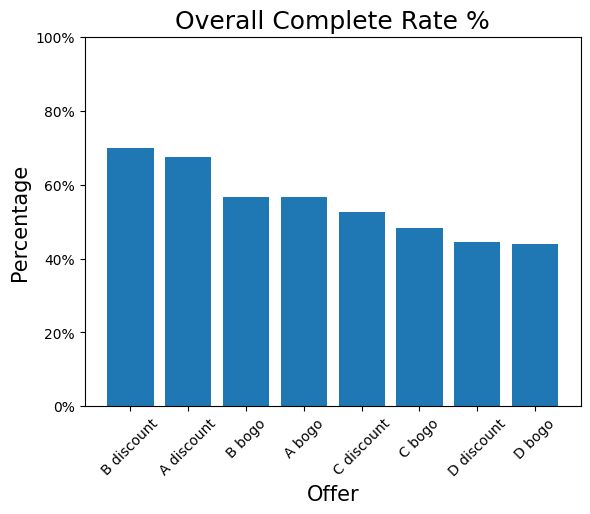

In [76]:
# Visualize
plt.bar(x = overall_complete_rate.index.values, height = overall_complete_rate.values)
plt.title('Overall Complete Rate %', fontsize = 18)
plt.xlabel('Offer', fontsize = 15)
plt.ylabel('Percentage', fontsize = 15)
plt.yticks(np.arange(0,1.2, 0.2), labels = ['0%', '20%', '40%', '60%', '80%', '100%'])
plt.xticks(rotation=45)
plt.show()
# overall_complete_rate = pd.Series(np.random.rand(10), 
#                                   index=['A bogo', 'B bogo', 'C bogo', 'D bogo', 'A discount', 'B discount', 'C discount', 'D discount', 'A informational', 'B informational'])

# plt.figure(figsize=(10, 6))  # Increased figure size for better visibility
# plt.bar(x=overall_complete_rate.index.values, height=overall_complete_rate.values)
# plt.title('Overall Complete Rate %', fontsize=18)
# plt.xlabel('Offer', fontsize=15)
# plt.ylabel('Percentage', fontsize=15)
# plt.yticks(np.arange(0, 1.2, 0.2), labels=['0%', '20%', '40%', '60%', '80%', '100%'])
# plt.xticks(rotation=45)  # Rotate the x-axis labels to avoid crowding
# plt.tight_layout()  # Adjust the padding between and around sub

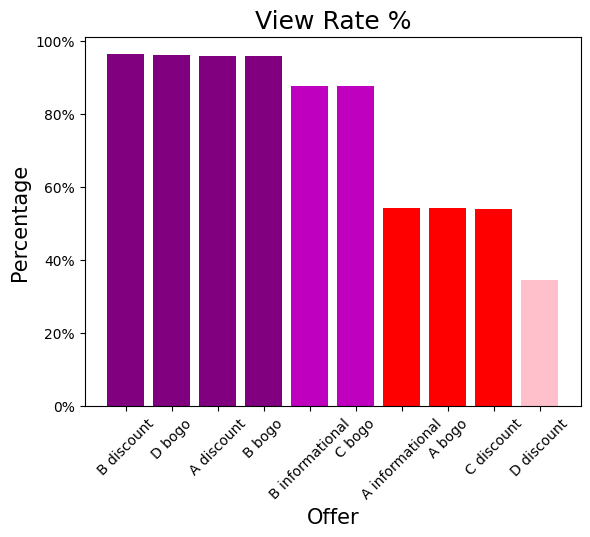

In [77]:
offer_viewed = event_offer[event_offer['event'] == 'offer viewed']
p1 = offer_viewed.value_counts('offer_alias').sort_values(ascending = False)
p1_rate = (p1.sort_index() / p0.sort_index()).sort_values(ascending = False)
plt.bar(x = np.arange(len(p1)), height = p1_rate.values, tick_label = p1_rate.index.values,
       color = ['purple', 'purple','purple', 'purple', 'm', 'm','r', 'r', 'r', 'pink'])
plt.title('View Rate %', fontsize = 18)
plt.xlabel('Offer', fontsize = 15)
plt.ylabel('Percentage', fontsize = 15)
plt.yticks(np.arange(0,1.2, 0.2), labels = ['0%', '20%', '40%', '60%', '80%', '100%'])
plt.xticks(rotation=45)
plt.show()

In [78]:
offer

,reward,channels,difficulty,duration,offer_type,id,offer_alias
0,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,A bogo
1,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,B bogo
2,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,C bogo
3,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,D bogo
4,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,A discount
5,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,B discount
6,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5,C discount
7,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,D discount
8,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed,A informational
9,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837,B informational


Very interesting information is revealed here. The 10 bars, representing the 10 offers, clearly show 4 levels in height, separating the offers into 4 groups. These 4 groups accurately corresponds to 4 combinations of channel of promotion. \
Offers sent through the same promotion channels had very similar view rate, despite of the difference in other factors (offer type, duration, reward and difficulty). Therefore, promotion channels is the most important (if not only) factor on the offer view rate. \
All channels contributed to offer view rate. However, their importance clearly differs:
Social Media > Email >= Mobile > Websites


### Completion Rate

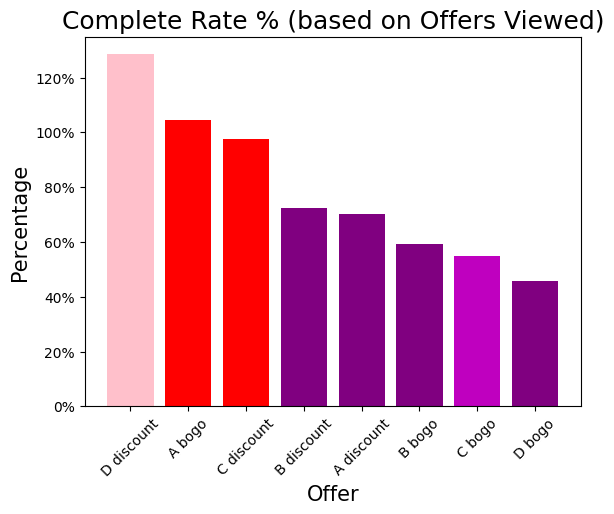

In [79]:
# offer_completed = event_offer[event_offer['event'] == 'offer completed']
p2 = offer_completed.value_counts('offer_alias').sort_values(ascending = False)

p2_rate = (p2.sort_index() / p1.sort_index()).sort_values(ascending = False)
color_list = ['pink', 'red', 'red', 'purple', 'purple', 'purple', 'm', 'purple']
plt.bar(x = p2_rate.index.values, height = p2_rate.values, color = color_list)
plt.title('Complete Rate % (based on Offers Viewed)', fontsize = 18)
plt.xlabel('Offer', fontsize = 15)
plt.ylabel('Percentage', fontsize = 15)
plt.yticks(np.arange(0,1.4, 0.2), labels = ['0%', '20%', '40%', '60%', '80%', '100%', '120%'])
plt.xticks(rotation=45)
plt.show()

For offers that have been viewed, the completion rate rages from 46% to 128%. \
Offers H and A both achived a completion rate of over 100%! This means on average they were completed by customers more than once. \
For offers with 5 top completion rate, all are of type 'discount', with Offer A being the only exception. This reveals that customers preferred 'dicount' type to 'bogo'. 

The main factor influencing offer completion rate is the offer type, 'Discount' > 'bogo'.



In [81]:
# Create a new df to hold the relavent variables
offers_added = offer.assign(view_rate = p1_rate.sort_index().values,
                            complete_rate = p2_rate.sort_index().values)

# Set `offer_alias` as index
offers_added.set_index('offer_alias', inplace = True)

# From the new df, extract `view_rate`, 'complete_rate' and other numeric columns
offers_numeric = offers_added.select_dtypes(include = 'number')
offers_numeric.head()

,reward,difficulty,duration,view_rate,complete_rate
offer_alias,,,,,
A bogo,5,5,7,0.543311,1.043874
B bogo,5,5,5,0.959587,0.702740
C bogo,10,10,7,0.544046,NaN
D bogo,10,10,5,0.959451,0.591410
A discount,3,7,7,0.964460,0.725672


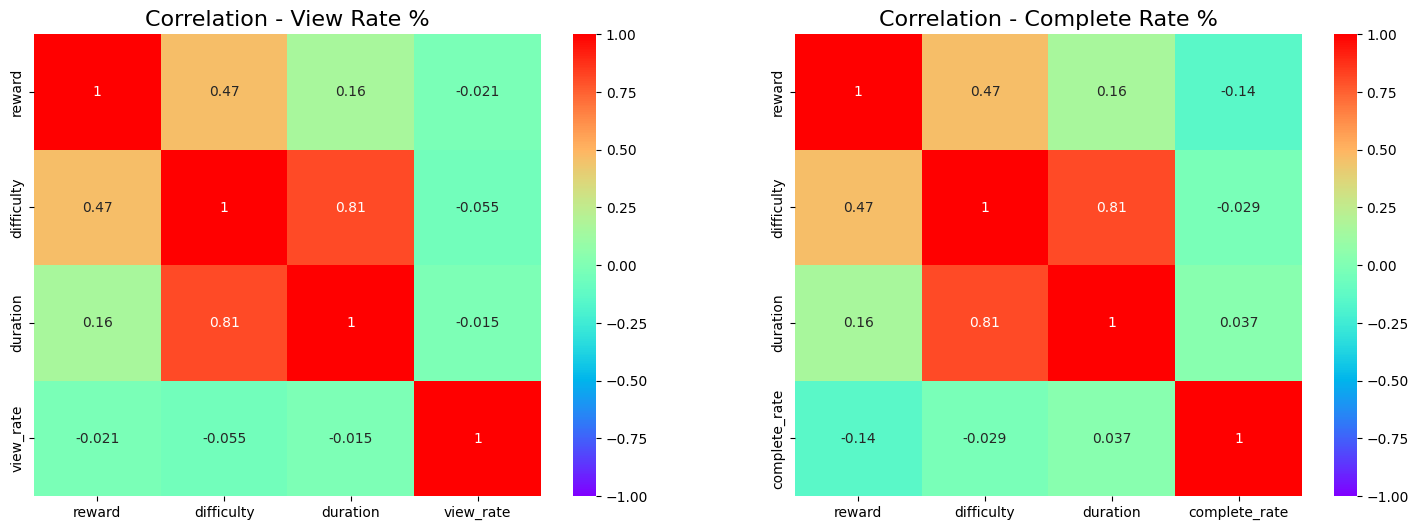

In [82]:
fig, axs = plt.subplots(1,2, figsize = (18, 6))
sns.heatmap(offers_numeric.iloc[:, :-1].corr(), cmap = 'rainbow', 
            annot = True, vmin = -1, vmax = 1, ax = axs[0])
axs[0].set_title('Correlation - View Rate %', fontsize = 16)

sns.heatmap(offers_numeric.iloc[:, [0,1,2,4]].corr(), cmap = 'rainbow', 
            annot = True, vmin = -1, vmax = 1, ax = axs[1])
axs[1].set_title('Correlation - Complete Rate %', fontsize = 16)
plt.show()


View Rate %

All of the three numeric factors (rewards, difficulty and duration) had a trivial correlation with the view rate.
Complete Rate %

Counter-intuitively, reward seems to be negatively correlated with offer completion rate. Note this does not mean reward negatively affected the completion rate. It was the fact that completion rate was predominantly influenced by offer type and that 'bogo' offers happened to have higher rewards (7.5 USD on average) than the 'discount' offers (3 USD on average) that led to this seemingly counter-intuitive result.

Similarly, offer difficulty seems to be possitively correlated with offer completion rate, but this does not mean difficulty positively affected the completion rate. The less popular 'bogo' offers had a lower difficulty (7.5 USD on average) than the more popular 'discount' offers (11.75 USD on average).

Duration seems to be positively correlated with offer complete rate. This makes sense as cutomers are more likely to complete an offer if they are given more time.

None of their effect on the completion rate is as determinative as the offer type.

